# VAE Reconstructions

This notebook explores the best and worst reconstructions by the VAE model.

It uses the csv output of make_interesting_examples.py.

In [1]:
import env
from data.modelnet10 import ModelNet10, KNOWN_NOT_INTERESTING_MODELNET10, KNOWN_INTERESTING_MODELNET10
from data.voxels import plot_voxels
from data import PROCESSED_DIR
import pandas as pd
import numpy as np
import os


# plot things
%matplotlib inline
# autoreload modules
%load_ext autoreload
%autoreload 2

In [2]:
recons_csv = os.path.join(PROCESSED_DIR, 'recons.csv')
df = pd.read_csv(recons_csv)
modelnet = ModelNet10(df, recons_csv, pctile=0)
#modelnet.filter_categories(['toilet', 'sofa', 'chair', 'monitor'])
modelnet.filter_categories(['bed'])
start = len(modelnet)
modelnet.drop_bad_models()
modelnet.drop_bad_models(models=KNOWN_NOT_INTERESTING_MODELNET10)
# drop because we are on the hunt for new interesting models
modelnet.drop_bad_models(models=KNOWN_INTERESTING_MODELNET10)
print('models dropped = {}'.format(start - len(modelnet)))

models dropped = 30


In [3]:
modelnet.df.head()

,category,dataset,model,binvox,dimension,x_rotations,z_rotations,max,min,mean,loss,recon_path
0,bed,test,bed_0579.off,bed_0579_32_x0_z0.binvox,32,0,0,1.000000,0.0,0.199438,0.003333,/home/jcworkma/jack/3d-form/src/../data/proces...
1,bed,test,bed_0548.off,bed_0548_32_x0_z0.binvox,32,0,0,1.000000,0.0,0.253561,0.004828,/home/jcworkma/jack/3d-form/src/../data/proces...
2,bed,test,bed_0570.off,bed_0570_32_x0_z0.binvox,32,0,0,0.999996,0.0,0.064928,0.002493,/home/jcworkma/jack/3d-form/src/../data/proces...
3,bed,test,bed_0524.off,bed_0524_32_x0_z0.binvox,32,0,0,1.000000,0.0,0.160621,0.003247,/home/jcworkma/jack/3d-form/src/../data/proces...
4,bed,test,bed_0559.off,bed_0559_32_x0_z0.binvox,32,0,0,1.000000,0.0,0.146993,0.003316,/home/jcworkma/jack/3d-form/src/../data/proces...


In [4]:
# some of the original binvoxs are empty; we can filter those out with this filter
not_empty = modelnet.df[modelnet.df['max'] > .9]
top = not_empty.sort_values('loss', ascending=False).head(10)
top

,category,dataset,model,binvox,dimension,x_rotations,z_rotations,max,min,mean,loss,recon_path
306,bed,train,bed_0513.off,bed_0513_32_x0_z0.binvox,32,0,0,1.000000,0.0,0.608235,0.025439,/home/jcworkma/jack/3d-form/src/../data/proces...
283,bed,train,bed_0208.off,bed_0208_32_x0_z0.binvox,32,0,0,0.999897,0.0,0.367357,0.017697,/home/jcworkma/jack/3d-form/src/../data/proces...
257,bed,train,bed_0482.off,bed_0482_32_x0_z0.binvox,32,0,0,0.999937,0.0,0.227562,0.012750,/home/jcworkma/jack/3d-form/src/../data/proces...
197,bed,train,bed_0500.off,bed_0500_32_x0_z0.binvox,32,0,0,0.999998,0.0,0.273151,0.009711,/home/jcworkma/jack/3d-form/src/../data/proces...
67,bed,test,bed_0573.off,bed_0573_32_x0_z0.binvox,32,0,0,0.999745,0.0,0.206296,0.009485,/home/jcworkma/jack/3d-form/src/../data/proces...
138,bed,train,bed_0164.off,bed_0164_32_x0_z0.binvox,32,0,0,1.000000,0.0,0.423893,0.009377,/home/jcworkma/jack/3d-form/src/../data/proces...
572,bed,train,bed_0168.off,bed_0168_32_x0_z0.binvox,32,0,0,1.000000,0.0,0.324793,0.009091,/home/jcworkma/jack/3d-form/src/../data/proces...
57,bed,test,bed_0552.off,bed_0552_32_x0_z0.binvox,32,0,0,1.000000,0.0,0.208375,0.008942,/home/jcworkma/jack/3d-form/src/../data/proces...
367,bed,train,bed_0298.off,bed_0298_32_x0_z0.binvox,32,0,0,0.999900,0.0,0.225414,0.008783,/home/jcworkma/jack/3d-form/src/../data/proces...
544,bed,train,bed_0070.off,bed_0070_32_x0_z0.binvox,32,0,0,0.999999,0.0,0.276463,0.008502,/home/jcworkma/jack/3d-form/src/../data/proces...


bed_0513_32_x0_z0.binvox
bed_0208_32_x0_z0.binvox
bed_0482_32_x0_z0.binvox
bed_0500_32_x0_z0.binvox
bed_0573_32_x0_z0.binvox
bed_0164_32_x0_z0.binvox
bed_0168_32_x0_z0.binvox
bed_0552_32_x0_z0.binvox
bed_0298_32_x0_z0.binvox
bed_0070_32_x0_z0.binvox


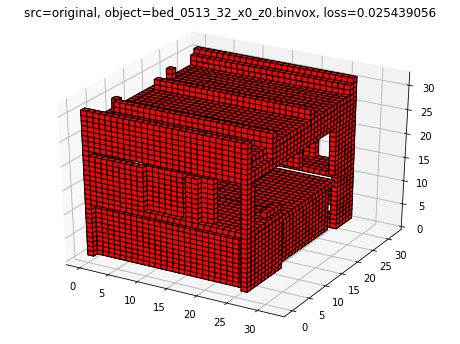

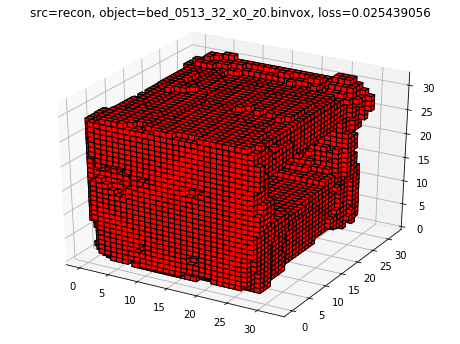

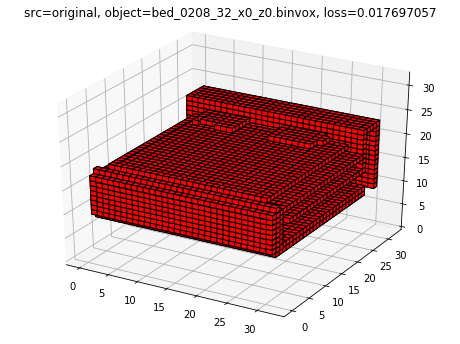

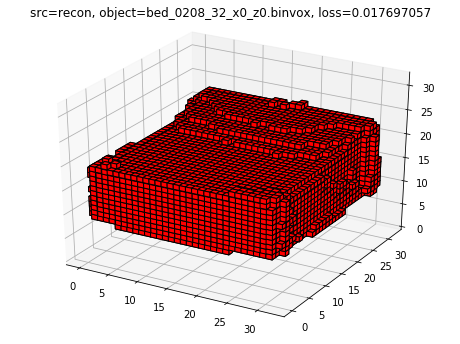

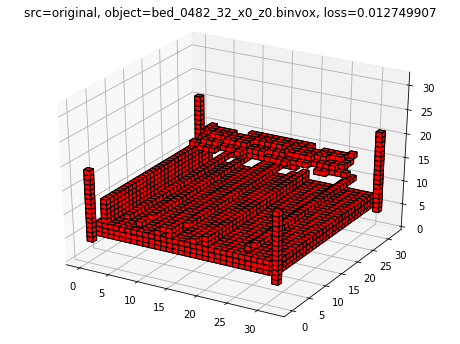

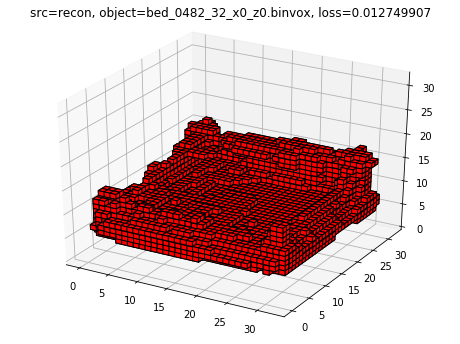

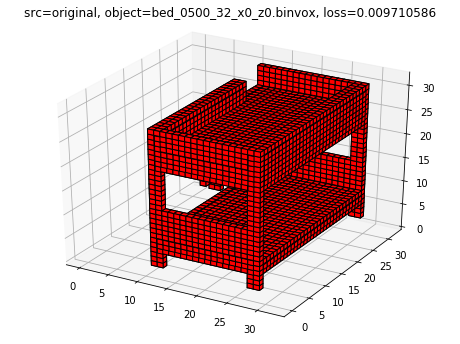

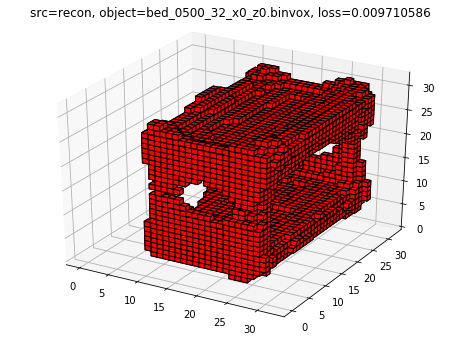

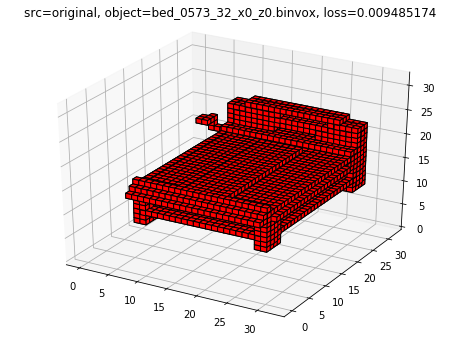

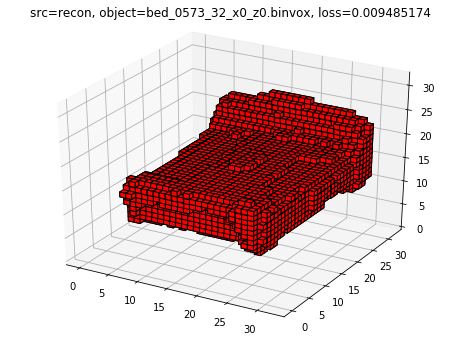

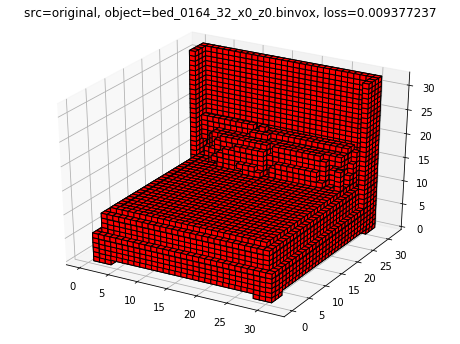

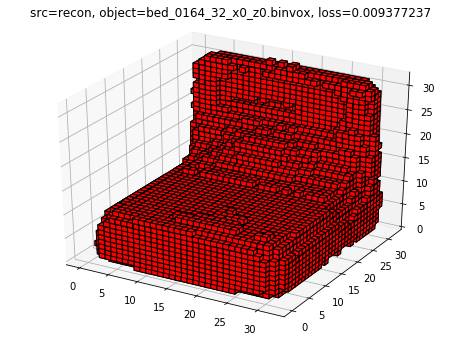

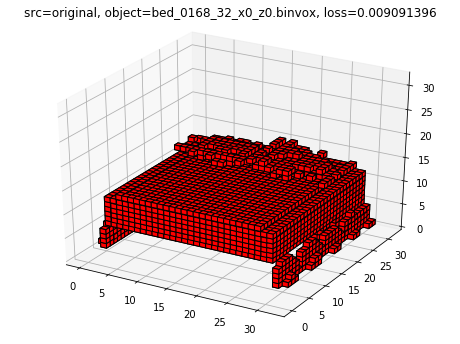

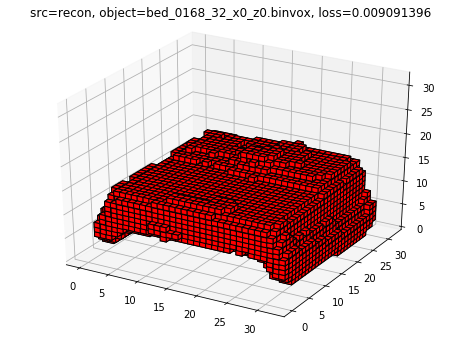

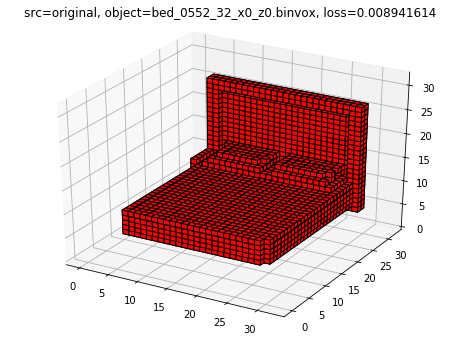

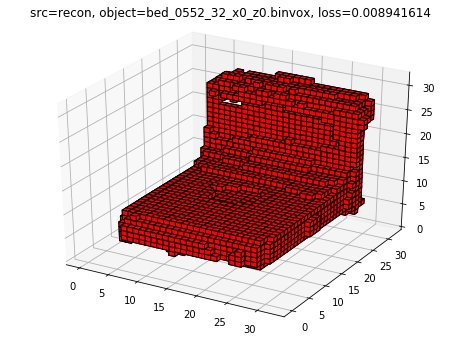

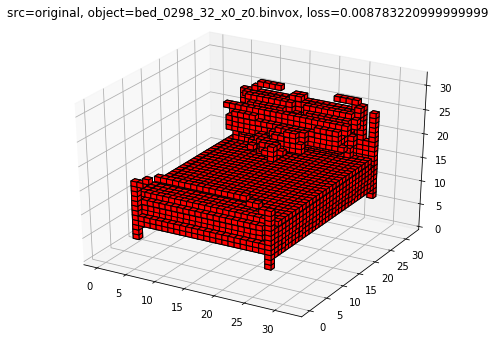

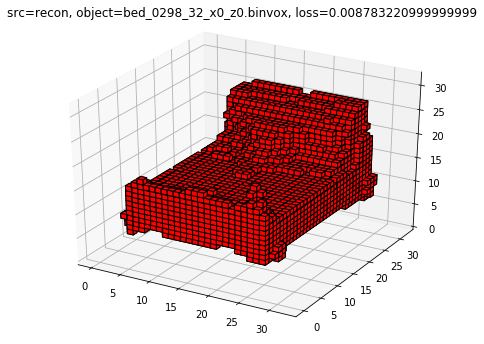

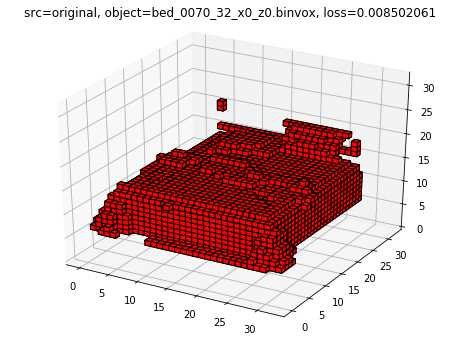

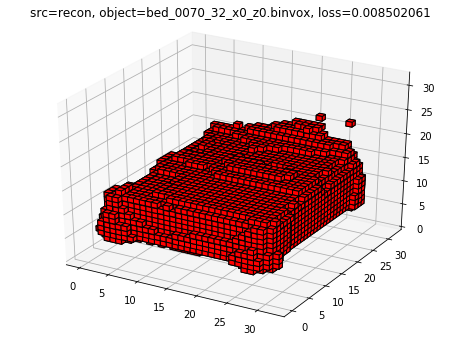

In [5]:
for i, (index, row) in enumerate(top.iterrows()):
    #print(row['recon_path'])
    vox_data = np.load(row['recon_path'])
    orig_vox = modelnet.get_voxels(row['category'], row['dataset'], row['binvox'])
    if row['category'] == 'dresser':
        vox_data = np.rot90(vox_data)
        orig_vox = np.rot90(orig_vox)
    title = 'src=original, object={}, loss={}'.format(row['binvox'], row['loss'])
    print(row['binvox'])
    plot_voxels(orig_vox > .9, title=title)
    title = 'src=recon, object={}, loss={}'.format(row['binvox'], row['loss'])
    plot_voxels(vox_data > .9, title=title)

## make_interesting_combinations.py check

<module 'matplotlib.pyplot' from '/home/jcworkma/jack/3d-form/.3d-form/lib/python3.5/site-packages/matplotlib/pyplot.py'>

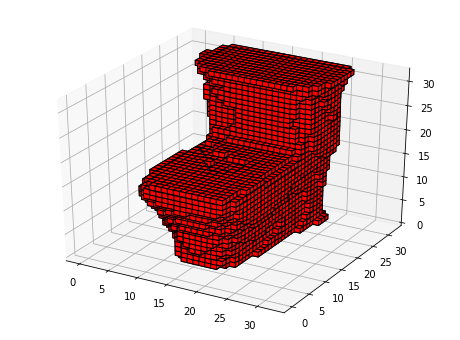

In [8]:
stl_path = ('/home/jcworkma/jack/3d-form/src/../data/processed/INTERESTING_COMBOS'
            '/toilet_0363_32_x0_z0/toilet_0363_32_x0_z0__toilet_0358_32_x0_z0.stl')
vox_path = ('/home/jcworkma/jack/3d-form/src/../data/processed/INTERESTING_COMBOS'
            '/toilet_0363_32_x0_z0/toilet_0363_32_x0_z0__toilet_0358_32_x0_z0.binvox.npy')
vox_data = np.load(vox_path)
plot_voxels(vox_data)